In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# load dataset from dataset.mnist
# 60000 for training, 10000 for test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Class 5')

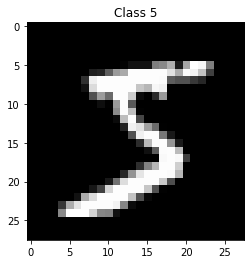

In [3]:
# Polit a grayscale image with the label
plt.imshow(X_train[0], cmap='gray')
plt.title("Class " + str(y_train[0]))

In [4]:
# Tensorflow can handle fromat: (batch, height, width, channel)
features_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
features_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

In [5]:
# very similar to min-max normalization: we transform the values within the range [0,1]
features_test /= 255
features_train /= 255

In [6]:
# we have 10 output classes we want to end up with one-hot-encoding
# as we have seen for the Iris-dataset
targets_train = np_utils.to_categorical(y_train, 10)
targets_test = np_utils.to_categorical(y_test, 10)

In [7]:
# Build the CNN
model = Sequential()

# 28x28 pixel image
# 32 is number of filters - (3, 3) size of filter
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

In [8]:
# Normalize the activations in the previous layers after the convolutional phase
# Trnasformation maintains the mean activation close to 0 &  std close to 1
# the scale of each dimension remains the same
# reduces running time of training significantly


model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())
model.add(BatchNormalization())

# fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

# regularization avoid overfitting
model.add(Dropout(0.2)) # probability is 0.2
model.add(Dense(10, activation='softmax'))

# Dropout,, Regularization
# Why? To control overfitting in ML and AI
# Dropout is inexpensive regularization tool
# We set the activation of giiven neuron to be 0 temporarily
# Works well with stochastic gradient descent
# Apply dropout in the hidden layer exclusively, simply omitting neurons with p(~0.5) probability
# prevent coadaptation among detectors, which helps drive better generalaiization in given model.
# less effective as the number of training records rises up

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 32)        1

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(features_train, targets_train, batch_size=128, epochs=2, validation_data=(features_test, targets_test), verbose=1)

Epoch 1/2
469/469 [==============================] - 183s 346ms/step - loss: 0.1926 - accuracy: 0.9410 - val_loss: 1.2067 - val_accuracy: 0.6376
Epoch 2/2
469/469 [==============================] - 160s 342ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0400 - val_accuracy: 0.9874


In [11]:
score = model.evaluate(features_test, targets_test)
print("test accuracy: %.2f" % score[1])

313/313 [==============================] - 7s 24ms/step - loss: 0.0400 - accuracy: 0.9874
test accuracy: 0.99


In [12]:
# data augmentation helps to reduce overfitting

train_generator = ImageDataGenerator(rotation_range =7, width_shift_range = 0.5, shear_range=0.22,
                                     height_shift_range = 0.07, zoom_range=0.05)
test_generator = ImageDataGenerator() # don't want transformation for test-set

train_generator = train_generator.flow(features_train, targets_train, batch_size = 64)
test_generator = test_generator.flow(features_test, targets_test, batch_size = 64)

model.fit_generator(train_generator, steps_per_epoch = 60000/64, epochs = 10,
                    validation_data=test_generator, validation_steps=10000/64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


937/937 [==============================] - 187s 198ms/step - loss: 0.2771 - accuracy: 0.9142 - val_loss: 0.0387 - val_accuracy: 0.9874
Epoch 2/10
937/937 [==============================] - 184s 196ms/step - loss: 0.1489 - accuracy: 0.9529 - val_loss: 0.0434 - val_accuracy: 0.9884
Epoch 3/10
937/937 [==============================] - 184s 196ms/step - loss: 0.1242 - accuracy: 0.9610 - val_loss: 0.0348 - val_accuracy: 0.9890
Epoch 4/10
937/937 [==============================] - 184s 196ms/step - loss: 0.1141 - accuracy: 0.9647 - val_loss: 0.0268 - val_accuracy: 0.9912
Epoch 5/10
937/937 [==============================] - 184s 197ms/step - loss: 0.1060 - accuracy: 0.9669 - val_loss: 0.0290 - val_accuracy: 0.9910
Epoch 6/10
937/937 [==============================] - 183s 195ms/step - loss: 0.0987 - accuracy: 0.9691 - val_loss: 0.0234 - val_accuracy: 0.9919
Epoch 7/10
937/937 [==============================] - 183s 195ms/step - loss: 0.0907 - accuracy: 0.9711 - val_loss: 0.0204 - val_accura